In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np


In [3]:
train_df_fault = pd.read_csv('TEP_Faulty_Training.csv')
#train_df_free = pd.read_csv('TEP_FaultFree_Training.csv')
#test_df_fault = pd.read_csv('TEP_Faulty_Testing.csv')
#test_df_free = pd.read_csv('TEP_FaultFree_Testing.csv')

In [3]:
#test_df_fault['faultNumber'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

In [4]:
# Exclude columns from standardization
columns_to_exclude = ['simulationRun', 'sample', 'faultNumber']

# Get columns to standardize
columns_to_standardize = [col for col in train_df_fault.columns if col not in columns_to_exclude]

# Standardize the data
scaler = StandardScaler()
train_df_fault[columns_to_standardize] = scaler.fit_transform(train_df_fault[columns_to_standardize])
#train_df_free[columns_to_standardize] = scaler.fit_transform(train_df_free[columns_to_standardize])

# Calculate average and standard deviation for each column
#average_values = train_df_free.drop(columns=columns_to_exclude).mean()
#std_dev_values = train_df_free.drop(columns=columns_to_exclude).std()


In [5]:
# Define the number of points to take from each set
points_per_set = 20

# Initialize an empty list to store the dataframes for the first 20 points from each set
first_20_points_dfs = []

# Calculate the number of sets based on the total number of points and the points per set
num_sets = len(train_df_fault) // 500

# Iterate over each set
for i in range(num_sets):
    # Calculate the starting index of the set
    start_index = i * 500
    # Take the first 20 points from the current set
    first_20_points_df = train_df_fault.iloc[start_index:start_index + points_per_set]
    # Append the dataframe to the list
    first_20_points_dfs.append(first_20_points_df)

# Concatenate the dataframes in the list to create the new dataframe
first20points_df = pd.concat(first_20_points_dfs, ignore_index=True)

# Calculate average and standard deviation for each column
average = first20points_df.drop(columns=columns_to_exclude).mean()
std_dev = first20points_df.drop(columns=columns_to_exclude).std()


In [6]:
print("Type of 'average':", type(average))
print("Average values:\n", average)
print("Type of 'std_dev':", type(std_dev))
print("Standard deviation values:\n", std_dev)

Type of 'average': <class 'pandas.core.series.Series'>
Average values:
 xmeas_1    -0.073048
xmeas_2    -0.015001
xmeas_3     0.033483
xmeas_4    -0.057963
xmeas_5    -0.000883
xmeas_6    -0.097460
xmeas_7    -0.234630
xmeas_8     0.079685
xmeas_9    -0.000952
xmeas_10   -0.112476
xmeas_11    0.202218
xmeas_12    0.009005
xmeas_13   -0.221874
xmeas_14    0.020591
xmeas_15    0.054184
xmeas_16   -0.240899
xmeas_17    0.032154
xmeas_18   -0.151812
xmeas_19   -0.229912
xmeas_20    0.097593
xmeas_21    0.126135
xmeas_22    0.188487
xmeas_23    0.129074
xmeas_24    0.064243
xmeas_25   -0.205914
xmeas_26    0.073939
xmeas_27    0.066302
xmeas_28    0.231506
xmeas_29    0.126330
xmeas_30    0.070041
xmeas_31   -0.204346
xmeas_32    0.029806
xmeas_33    0.084772
xmeas_34    0.247733
xmeas_35    0.186059
xmeas_36    0.184780
xmeas_37    0.009719
xmeas_38   -0.035363
xmeas_39    0.111750
xmeas_40   -0.031785
xmeas_41    0.058980
xmv_1      -0.141074
xmv_2      -0.063806
xmv_3      -0.282716
xmv_

In [19]:
# Define the number of points to take from each set
points_per_set = 480

# Initialize an empty list to store the dataframes for the last 480 points from each set
last_480_points_dfs = []

# Calculate the number of sets based on the total number of points and the points per set
num_sets = len(train_df_fault) // 500

# Iterate over each set
for i in range(num_sets):
    # Calculate the starting index of the set
    start_index = (i * 500) + 20  # Skip the first 20 points
    # Take the last 480 points from the current set
    last_480_points_df = train_df_fault.iloc[start_index + 500 - points_per_set:start_index + 500]
    # Append the dataframe to the list
    last_480_points_dfs.append(last_480_points_df)

# Concatenate the dataframes in the list to create the new dataframe
last480points_df = pd.concat(last_480_points_dfs, ignore_index=True)


In [30]:
# Shuffle the order of the chunks
num_chunks = len(last480points_df) // 480
chunk_indices = np.arange(num_chunks)
np.random.shuffle(chunk_indices)

# Reconstruct the DataFrame with shuffled chunks
shuffled_indices = np.concatenate([np.arange(i * 480, (i + 1) * 480) for i in chunk_indices])
shuffled_df = last480points_df.iloc[shuffled_indices]

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
798240,4,84,41,-0.038644,0.978079,0.028407,-0.009174,1.251886,0.743367,-0.186924,...,-0.131901,-0.259562,-0.143688,-0.043208,0.000775,0.192377,-0.727346,-0.173423,0.364607,0.144733
798241,4,84,42,-0.045733,0.947965,0.036513,-0.330335,0.639826,0.648793,-0.204031,...,-0.133993,-0.254485,0.004824,-0.063780,-0.008580,-0.694662,0.226239,-0.167968,0.319063,0.155164
798242,4,84,43,0.085538,0.042231,-0.085969,-0.348436,0.924304,0.708690,-0.217190,...,-0.064386,-0.184966,0.001986,-0.034545,0.052888,0.045215,-1.148806,-0.187516,0.324856,0.113439
798243,4,84,44,0.072364,0.181219,-0.052647,-0.167149,-0.118784,-0.069968,-0.286932,...,-0.072945,-0.175495,-0.130445,-0.076323,0.012451,-0.430517,0.257192,-0.207745,0.329750,0.473900
798244,4,84,45,-0.198135,0.438345,-0.033734,0.229433,-0.062750,0.355614,-0.288248,...,-0.054116,-0.355590,-0.320578,-0.047990,0.019950,0.501959,0.724020,-0.198823,0.282608,-0.237943
798245,4,84,46,-0.202415,0.366535,-0.089572,-0.153436,-0.881704,-0.322164,-0.242192,...,-0.039853,-0.352465,-0.316118,-0.046366,0.042914,0.740334,0.969095,-0.187004,0.281310,-0.478444
798246,4,84,47,-0.079303,0.137206,0.338214,0.034433,-1.011012,0.100265,-0.207979,...,-0.077699,-0.285192,0.011716,-0.039959,-0.099894,-1.686817,0.032894,-0.190243,0.258937,-0.141936
798247,4,84,48,-0.072549,0.019067,0.240949,-0.048942,0.195867,0.093960,-0.222453,...,-0.053165,-0.290074,-0.114904,-0.074698,-0.107316,0.834599,-0.851155,-0.197346,0.338539,-0.098279
798248,4,84,49,-0.007281,0.345687,0.014898,-0.112297,-0.942048,0.352462,-0.242192,...,0.039073,-0.223143,-0.280308,-0.055750,-0.048167,-0.409494,0.057486,-0.195016,0.291497,-0.557645
798249,4,84,50,0.000877,0.266928,0.144585,0.041838,-1.467902,-0.933741,-0.247455,...,0.006362,-0.228952,-0.449360,-0.060803,-0.031544,0.286981,1.547012,-0.190130,0.317465,-0.754874


In [38]:
# Function to generate synthetic rows with faultNumber as 0 and random values based on average and std
def generate_synthetic_rows(avg_values, std_values, min_rows=1, max_rows=250):
    num_rows = np.random.randint(min_rows, max_rows + 1)  # Generate random number of rows
    synthetic_rows = pd.DataFrame()
    for col in avg_values.index:
        synthetic_rows[col] = np.random.normal(avg_values[col], std_values[col], size=num_rows)
    synthetic_rows['faultNumber'] = 0  # Set faultNumber as 0
    synthetic_rows['faultOccurrence'] = 0  # Set faultOccurrence as 0
    return synthetic_rows

# Initialize empty list to store reconstructed last 480 rows dataframes
reconstructed_last_480_dfs = []

# Iterate over each set
for i in range(num_sets):
    # Calculate the starting index of the set
    start_index = i * 500

    # Generate synthetic rows for the beginning and end
    num_synthetic_rows_start = np.random.randint(1, 1001)  # Generate random number between 1 and 250 for the start
    num_synthetic_rows_end = np.random.randint(1, 1001)  # Generate random number between 1 and 250 for the end
    synthetic_rows_start = generate_synthetic_rows(average, std_dev, max_rows=num_synthetic_rows_start)
    synthetic_rows_end = generate_synthetic_rows(average, std_dev, max_rows=num_synthetic_rows_end)
    
    # Extract chunk for this set from the shuffled dataset
    set_chunk = shuffled_df.iloc[i * 480: (i + 1) * 480].copy()
    
    # Concatenate synthetic rows with the chunks
    reconstructed_last_480_df = pd.concat([synthetic_rows_start, set_chunk, synthetic_rows_end], ignore_index=True)
    
    # Add faultOccurrence column
    reconstructed_last_480_df['faultOccurrence'] = reconstructed_last_480_df['faultNumber'].apply(lambda x: 0 if x == 0 else 1)
    
    # Reorder columns to ensure faultNumber and faultOccurrence are on the left side
    cols = ['faultNumber', 'faultOccurrence'] + [col for col in reconstructed_last_480_df.columns if col not in ['faultNumber', 'faultOccurrence']]
    reconstructed_last_480_df = reconstructed_last_480_df[cols]
    
    # Append reconstructed dataframe to list
    reconstructed_last_480_dfs.append(reconstructed_last_480_df)

# Concatenate all reconstructed last 480 rows dataframes
reconstructed_last_480_full_df = pd.concat(reconstructed_last_480_dfs, ignore_index=True)

# Remove simulationRun and sample columns
reconstructed_df = reconstructed_last_480_full_df.drop(columns=['simulationRun', 'sample'])


In [39]:
reconstructed_df.head()

,faultNumber,faultOccurrence,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,0,-0.314521,0.206706,0.467935,-0.372161,-0.349452,0.109471,-0.243620,0.070797,...,0.066645,-0.407287,-0.173219,-0.090774,0.019754,-0.980940,-0.895641,-0.186526,-0.025459,-0.707759
1,0,0,-0.039404,0.227486,-0.500002,-0.061173,-0.689881,0.458065,-0.211886,-0.696106,...,-0.021992,-0.310417,-0.224462,-0.069100,-0.118322,-1.302023,0.410276,-0.156195,-0.186736,-0.393821
2,0,0,-0.068199,-0.272427,-0.105503,-0.502392,-0.393098,0.164346,-0.239036,0.413166,...,-0.081105,-0.280246,-0.346259,-0.002190,-0.088051,0.103118,1.136940,-0.188147,-0.038354,-0.029488
3,0,0,0.392222,0.085363,0.490939,-0.200437,0.460008,0.868804,-0.188250,0.542744,...,-0.073580,-0.077924,-0.333595,-0.105948,-0.038011,1.278877,1.466087,-0.209400,0.006617,0.099217
4,0,0,-0.265491,-0.320547,-0.222785,-0.321670,-0.785139,-0.601376,-0.207135,0.597304,...,-0.287943,-0.330701,-0.209175,-0.087935,0.048394,0.068811,0.676301,-0.180381,-0.124341,-0.074559


In [40]:
reconstructed_df['faultNumber'].unique()

array([ 0,  4,  5,  7,  8, 10, 11,  1,  2, 19, 20, 18,  9, 17, 12, 14, 15,
        3, 16,  6, 13], dtype=int64)

In [41]:
reconstructed_df['faultOccurrence'].unique()

array([0, 1], dtype=int64)

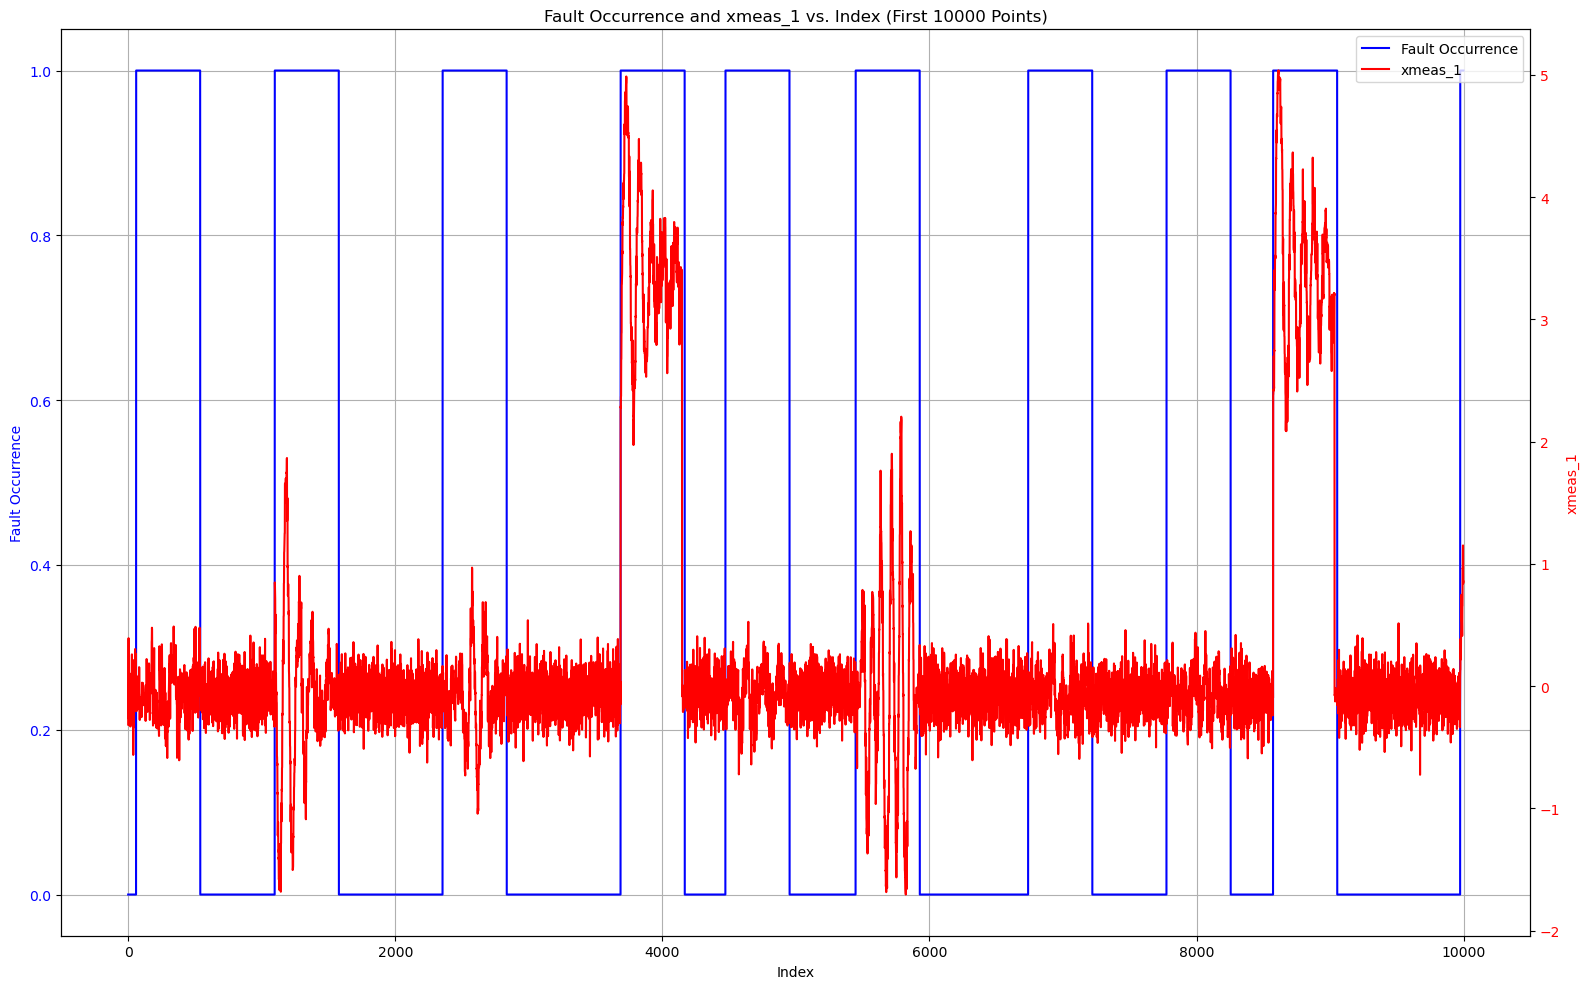

In [42]:
# Create a figure with one subplot
fig, ax1 = plt.subplots(figsize=(16, 10))

# Plot faultOccurence vs. index for the first 10000 points without markers
ax1.plot(reconstructed_df.index[:10000], reconstructed_df['faultOccurrence'][:10000], linestyle='-', color='blue', label='Fault Occurrence')
ax1.set_xlabel('Index')
ax1.set_ylabel('Fault Occurrence', color='blue')
ax1.set_title('Fault Occurrence and xmeas_1 vs. Index (First 10000 Points)')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create another y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot xmeas_1 vs. index for the first 10000 points
ax2.plot(reconstructed_df.index[:10000], reconstructed_df['xmeas_1'][:10000], linestyle='-', color='red', label='xmeas_1')
ax2.set_ylabel('xmeas_1', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [43]:
# Save DataFrame to CSV file
reconstructed_df.to_csv('reconstructed_data.csv', index=False)

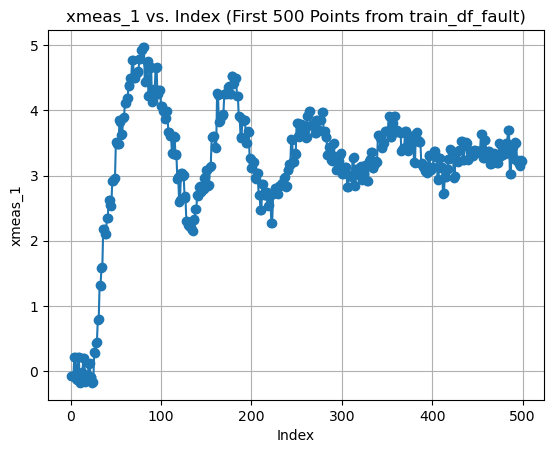

In [21]:
# Select the first 500 points from train_df_fault
first_500_points_df_fault = train_df_fault.head(500)

# Plot xmeas_1 vs. index
plt.plot(first_500_points_df_fault.index, first_500_points_df_fault['xmeas_1'], marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('xmeas_1')
plt.title('xmeas_1 vs. Index (First 500 Points from train_df_fault)')
plt.grid(True)
plt.show()


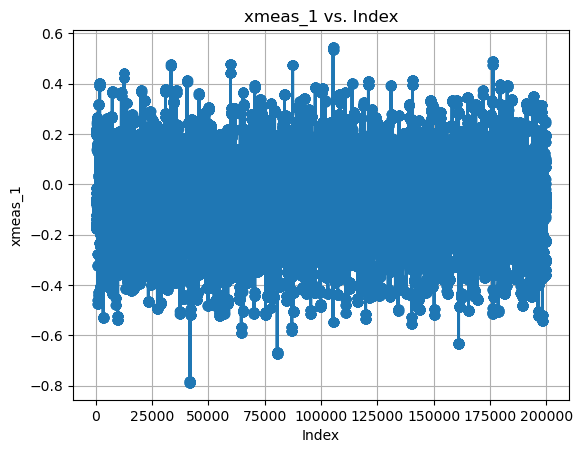

In [20]:
# Plot xmeas_1 vs. index
plt.plot(first20points_df.index, first20points_df['xmeas_1'], marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('xmeas_1')
plt.title('xmeas_1 vs. Index')
plt.grid(True)
plt.show()

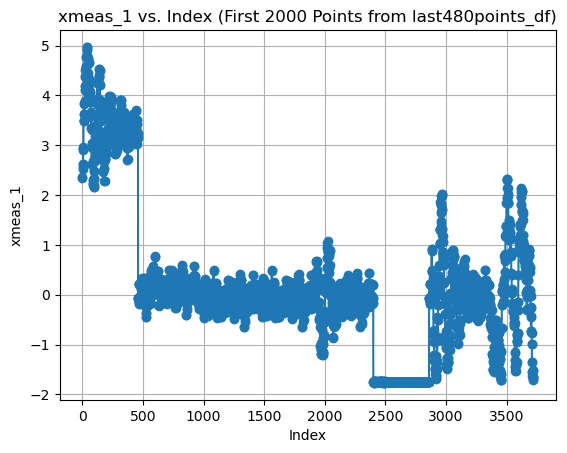

In [22]:
# Select the first 2000 points from last480points_df
first_2000_points_last480_df = last480points_df.head(3720)

# Plot xmeas_1 vs. index
plt.plot(first_2000_points_last480_df.index, first_2000_points_last480_df['xmeas_1'], marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('xmeas_1')
plt.title('xmeas_1 vs. Index (First 2000 Points from last480points_df)')
plt.grid(True)
plt.show()
